In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.spines import Spine
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator
import math
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
assemblies = ['mm10', 'hg19', 'gr38']
dfs = [pd.read_table('../../{}_map.tsv'.format(a)) for a in assemblies]

In [3]:
for d in dfs:
    d.usable_frags = d.usable_frags.apply(lambda x: pd.to_numeric(x.replace(',','') if isinstance(x, str) else x))

In [4]:
df = pd.concat(dfs)

In [5]:
df = df.sort_values(by='usable_frags').reset_index(drop=True)

In [6]:
df.shape

(19999, 41)

In [7]:
df.target_type.value_counts()

transcription factor                                                               4781
histone,histone modification,broad histone mark                                    4447
histone,histone modification,narrow histone mark                                   3246
control                                                                            2919
transcription factor,RNA binding protein                                           1168
recombinant protein,transcription factor                                           1046
transcription factor,recombinant protein                                            574
transcription factor,chromatin remodeller                                           437
histone,histone modification                                                        375
transcription factor,chromatin remodeller,RNA binding protein                       345
RNA binding protein,transcription factor                                            300
other context,other post-transla

In [264]:
from matplotlib.ticker import FuncFormatter

def show_total(df):
    total = df.shape[0]
    props = dict(boxstyle='round', facecolor='black', alpha=0.5)
    ax.text(
        0.90,
        0.85,
        'Total: {:,}'.format(total),
        transform=ax.transAxes,
        family='Quicksand',
        weight='bold',
        color='white',
        bbox=props
    )

def make_quantile(quantile, df, ax, field):
    height = ax.get_yticks()[-1] * 0.85
    ax.text(
        df[field].quantile(quantile),
        height,
        '{}% ({:,})'.format(quantile * 100, int(df.usable_frags.quantile(quantile))),
        rotation=-90,
        color='black',
        size=10,
        family='Quicksand',
        weight='bold'
    )
    ax.axvline(
        df.usable_frags.quantile(quantile),
        ymax=1,
        color='#de2d26',
        linestyle='dashed',
        lw=2,
        clip_on=False,
    )
    
def make_plot(df, description, ax, field):
    df = df.sort_values(by=field).reset_index(drop=True)
    sns.set(style='white', font='Quicksand')
    sns.distplot(
        df.usable_frags.dropna(),
        color='lightblue',
        kde_kws={'color': 'black', 'alpha': 0.4},
        ax=ax
    )
    sns.despine(left=True, bottom=True)
    ax.get_xaxis().set_major_formatter(
        FuncFormatter(lambda x, loc: '{:,}'.format(int(x)))
    )
    make_quantile(0.025, df, ax, field)
    make_quantile(0.5, df, ax, field)
    make_quantile(0.975, df, ax, field)
    show_total(df)
    ax.set_title(
        description,
        y=1.0,
        size=14
    )
    rstyle(ax)

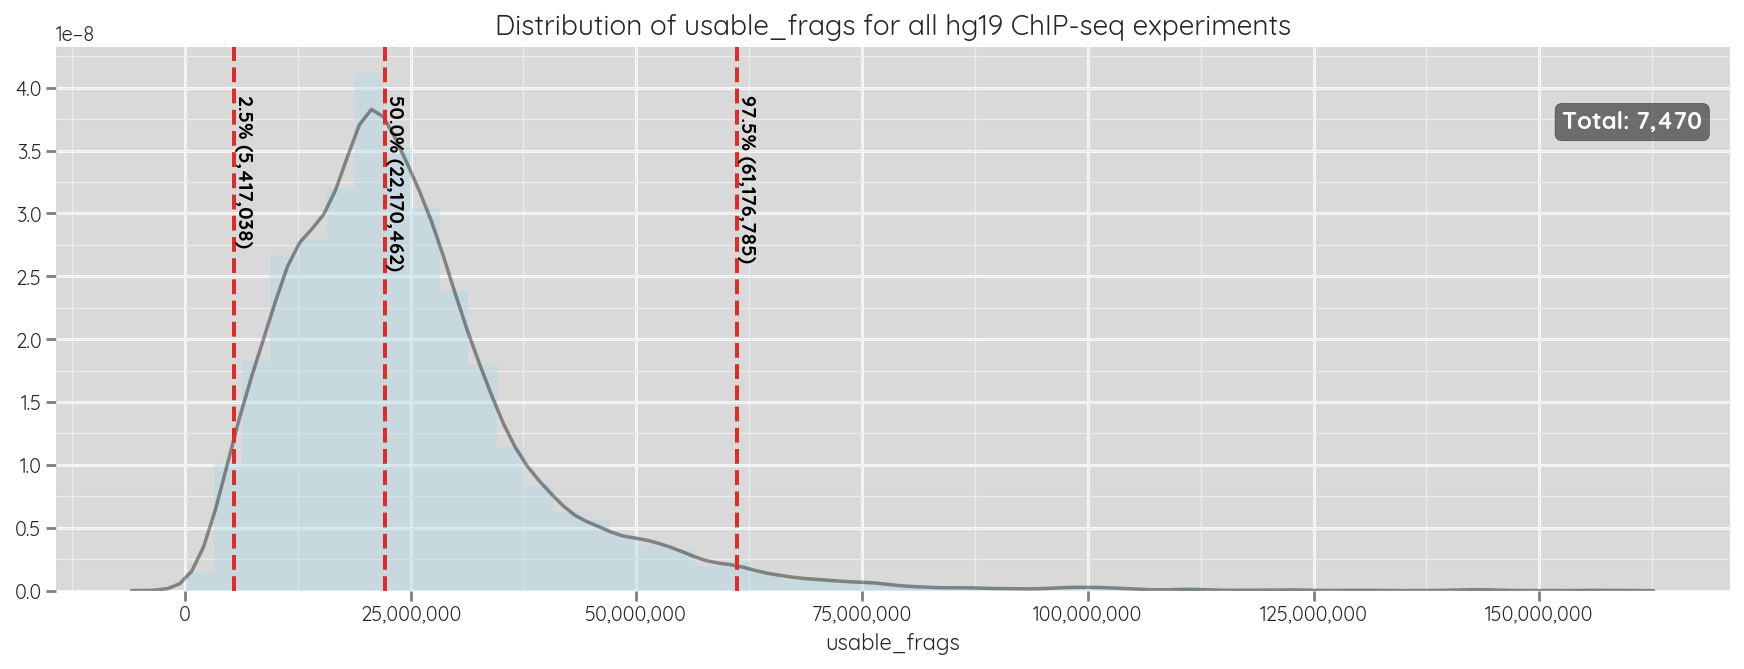

In [265]:
fig, ax = plt.subplots(figsize=[15, 5])
make_plot(
    df[df.assembly == 'hg19'],
    'Distribution of usable_frags for all hg19 ChIP-seq experiments',
    ax,
    'usable_frags'
)

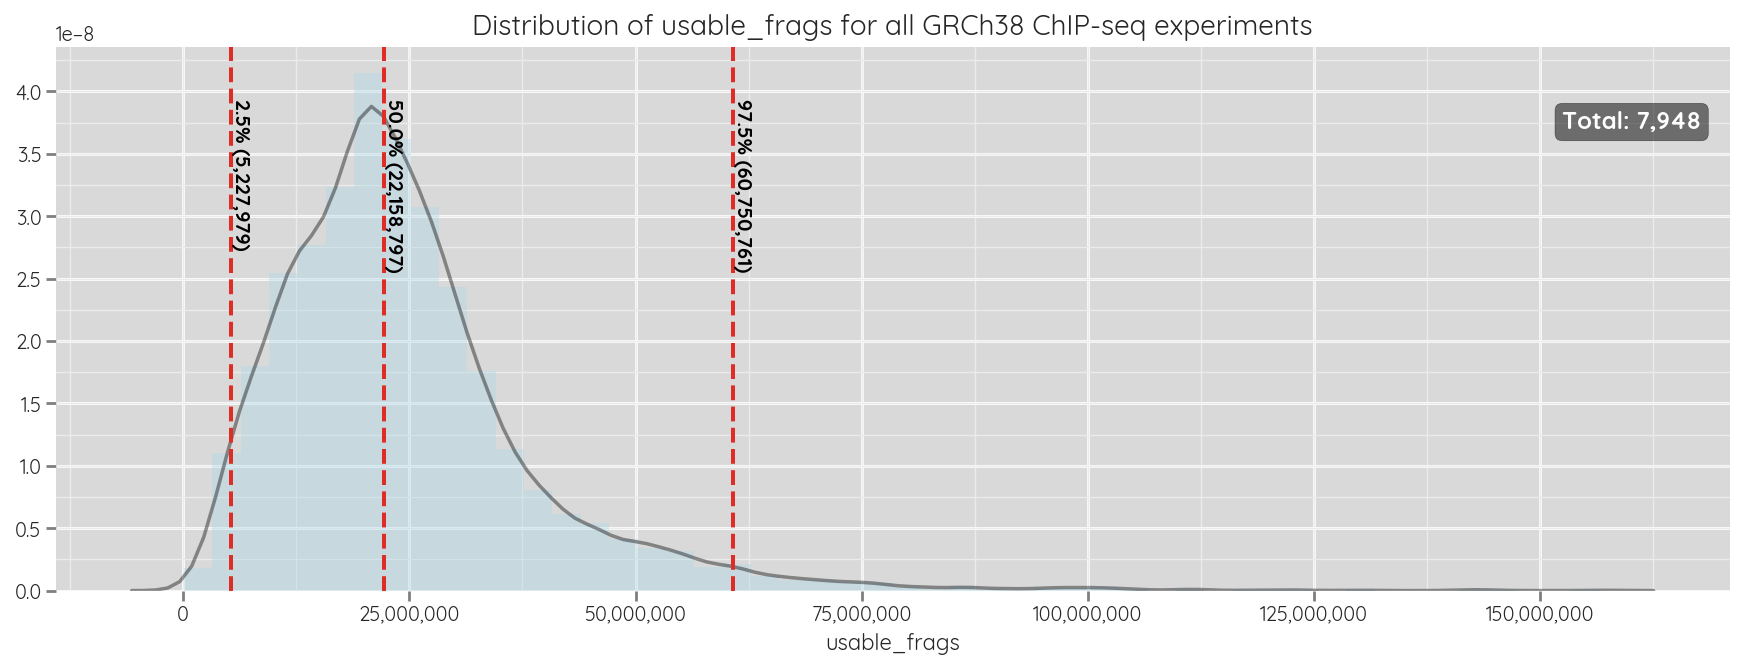

In [266]:
fig, ax = plt.subplots(figsize=[15, 5])
make_plot(
    df[df.assembly == 'GRCh38'],
    'Distribution of usable_frags for all GRCh38 ChIP-seq experiments',
    ax,
    'usable_frags'
)

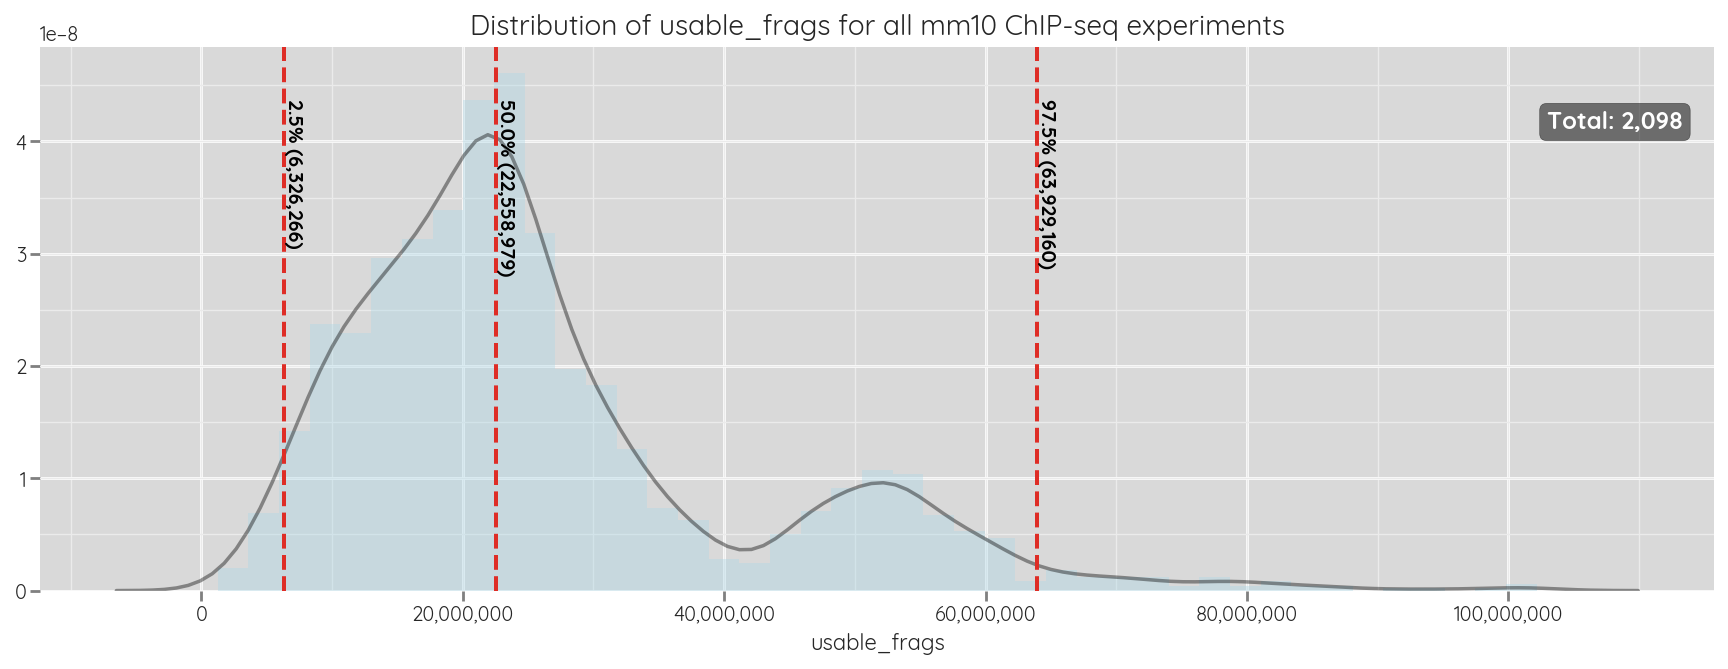

In [267]:
fig, ax = plt.subplots(figsize=[15, 5])
make_plot(
    df[df.assembly == 'mm10'],
    'Distribution of usable_frags for all mm10 ChIP-seq experiments',
    ax,
    'usable_frags'
)

In [202]:
facets = [
    ('Distribution of usable_frags for controls (all assemblies)', df[df.target_type == 'control']),
    ('Distribution of usable_frags for GRCh38 controls', df[(df.target_type == 'control') & (df.assembly == 'GRCh38')]),
    ('Distribution of usable_frags for hg19 controls', df[(df.target_type == 'control') & (df.assembly == 'hg19')]),
    ('Distribution of usable_frags for mm10 controls', df[(df.target_type == 'control') & (df.assembly == 'mm10')]),
    ('Distribution of usable_frags for broad marks (except H3K9me3) (all assemblies)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & ~(df.target.apply(lambda x: 'H3K9me3' in x))]),
    ('Distribution of usable_frags for broad marks (except H3K9me3) (GRCh38)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & ~(df.target.apply(lambda x: 'H3K9me3' in x))
                                                                                          & (df.assembly == 'GRCh38')]),
    ('Distribution of usable_frags for broad marks (except H3K9me3) (hg19)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & ~(df.target.apply(lambda x: 'H3K9me3' in x))
                                                                                          & (df.assembly == 'hg19')]),
    ('Distribution of usable_frags for broad marks (except H3K9me3) (mm10)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & ~(df.target.apply(lambda x: 'H3K9me3' in x))
                                                                                          & (df.assembly == 'mm10')]),
    ('Distribution of usable_frags for narrow marks (all assemblies)', df[(df.target_type.apply(lambda x: 'narrow histone' in x))]),
    ('Distribution of usable_frags for narrow marks (GRCh38)', df[(df.target_type.apply(lambda x: 'narrow histone' in x))
                                                                                          & (df.assembly == 'GRCh38')]),
    ('Distribution of usable_frags for narrow marks (hg19)', df[(df.target_type.apply(lambda x: 'narrow histone' in x))
                                                                                          & (df.assembly == 'hg19')]),
    ('Distribution of usable_frags for narrow marks (mm10)', df[(df.target_type.apply(lambda x: 'narrow histone' in x))
                                                                                          & (df.assembly == 'mm10')]),
    ('Distribution of usable_frags for H3K9me3 (all assemblies)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & (df.target.apply(lambda x: 'H3K9me3' in x))]),
    ('Distribution of usable_frags for H3K9me3 (GRCh38)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & (df.target.apply(lambda x: 'H3K9me3' in x))
                                                                                          & (df.assembly == 'GRCh38')]),
    ('Distribution of usable_frags for H3K9me3 (hg19)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & (df.target.apply(lambda x: 'H3K9me3' in x))
                                                                                          & (df.assembly == 'hg19')]),
    ('Distribution of usable_frags for H3K9me3 (mm10)', df[(df.target_type.apply(lambda x: 'broad histone' in x))
                                                                                          & (df.target.apply(lambda x: 'H3K9me3' in x))
                                                                                          & (df.assembly == 'mm10')])
]

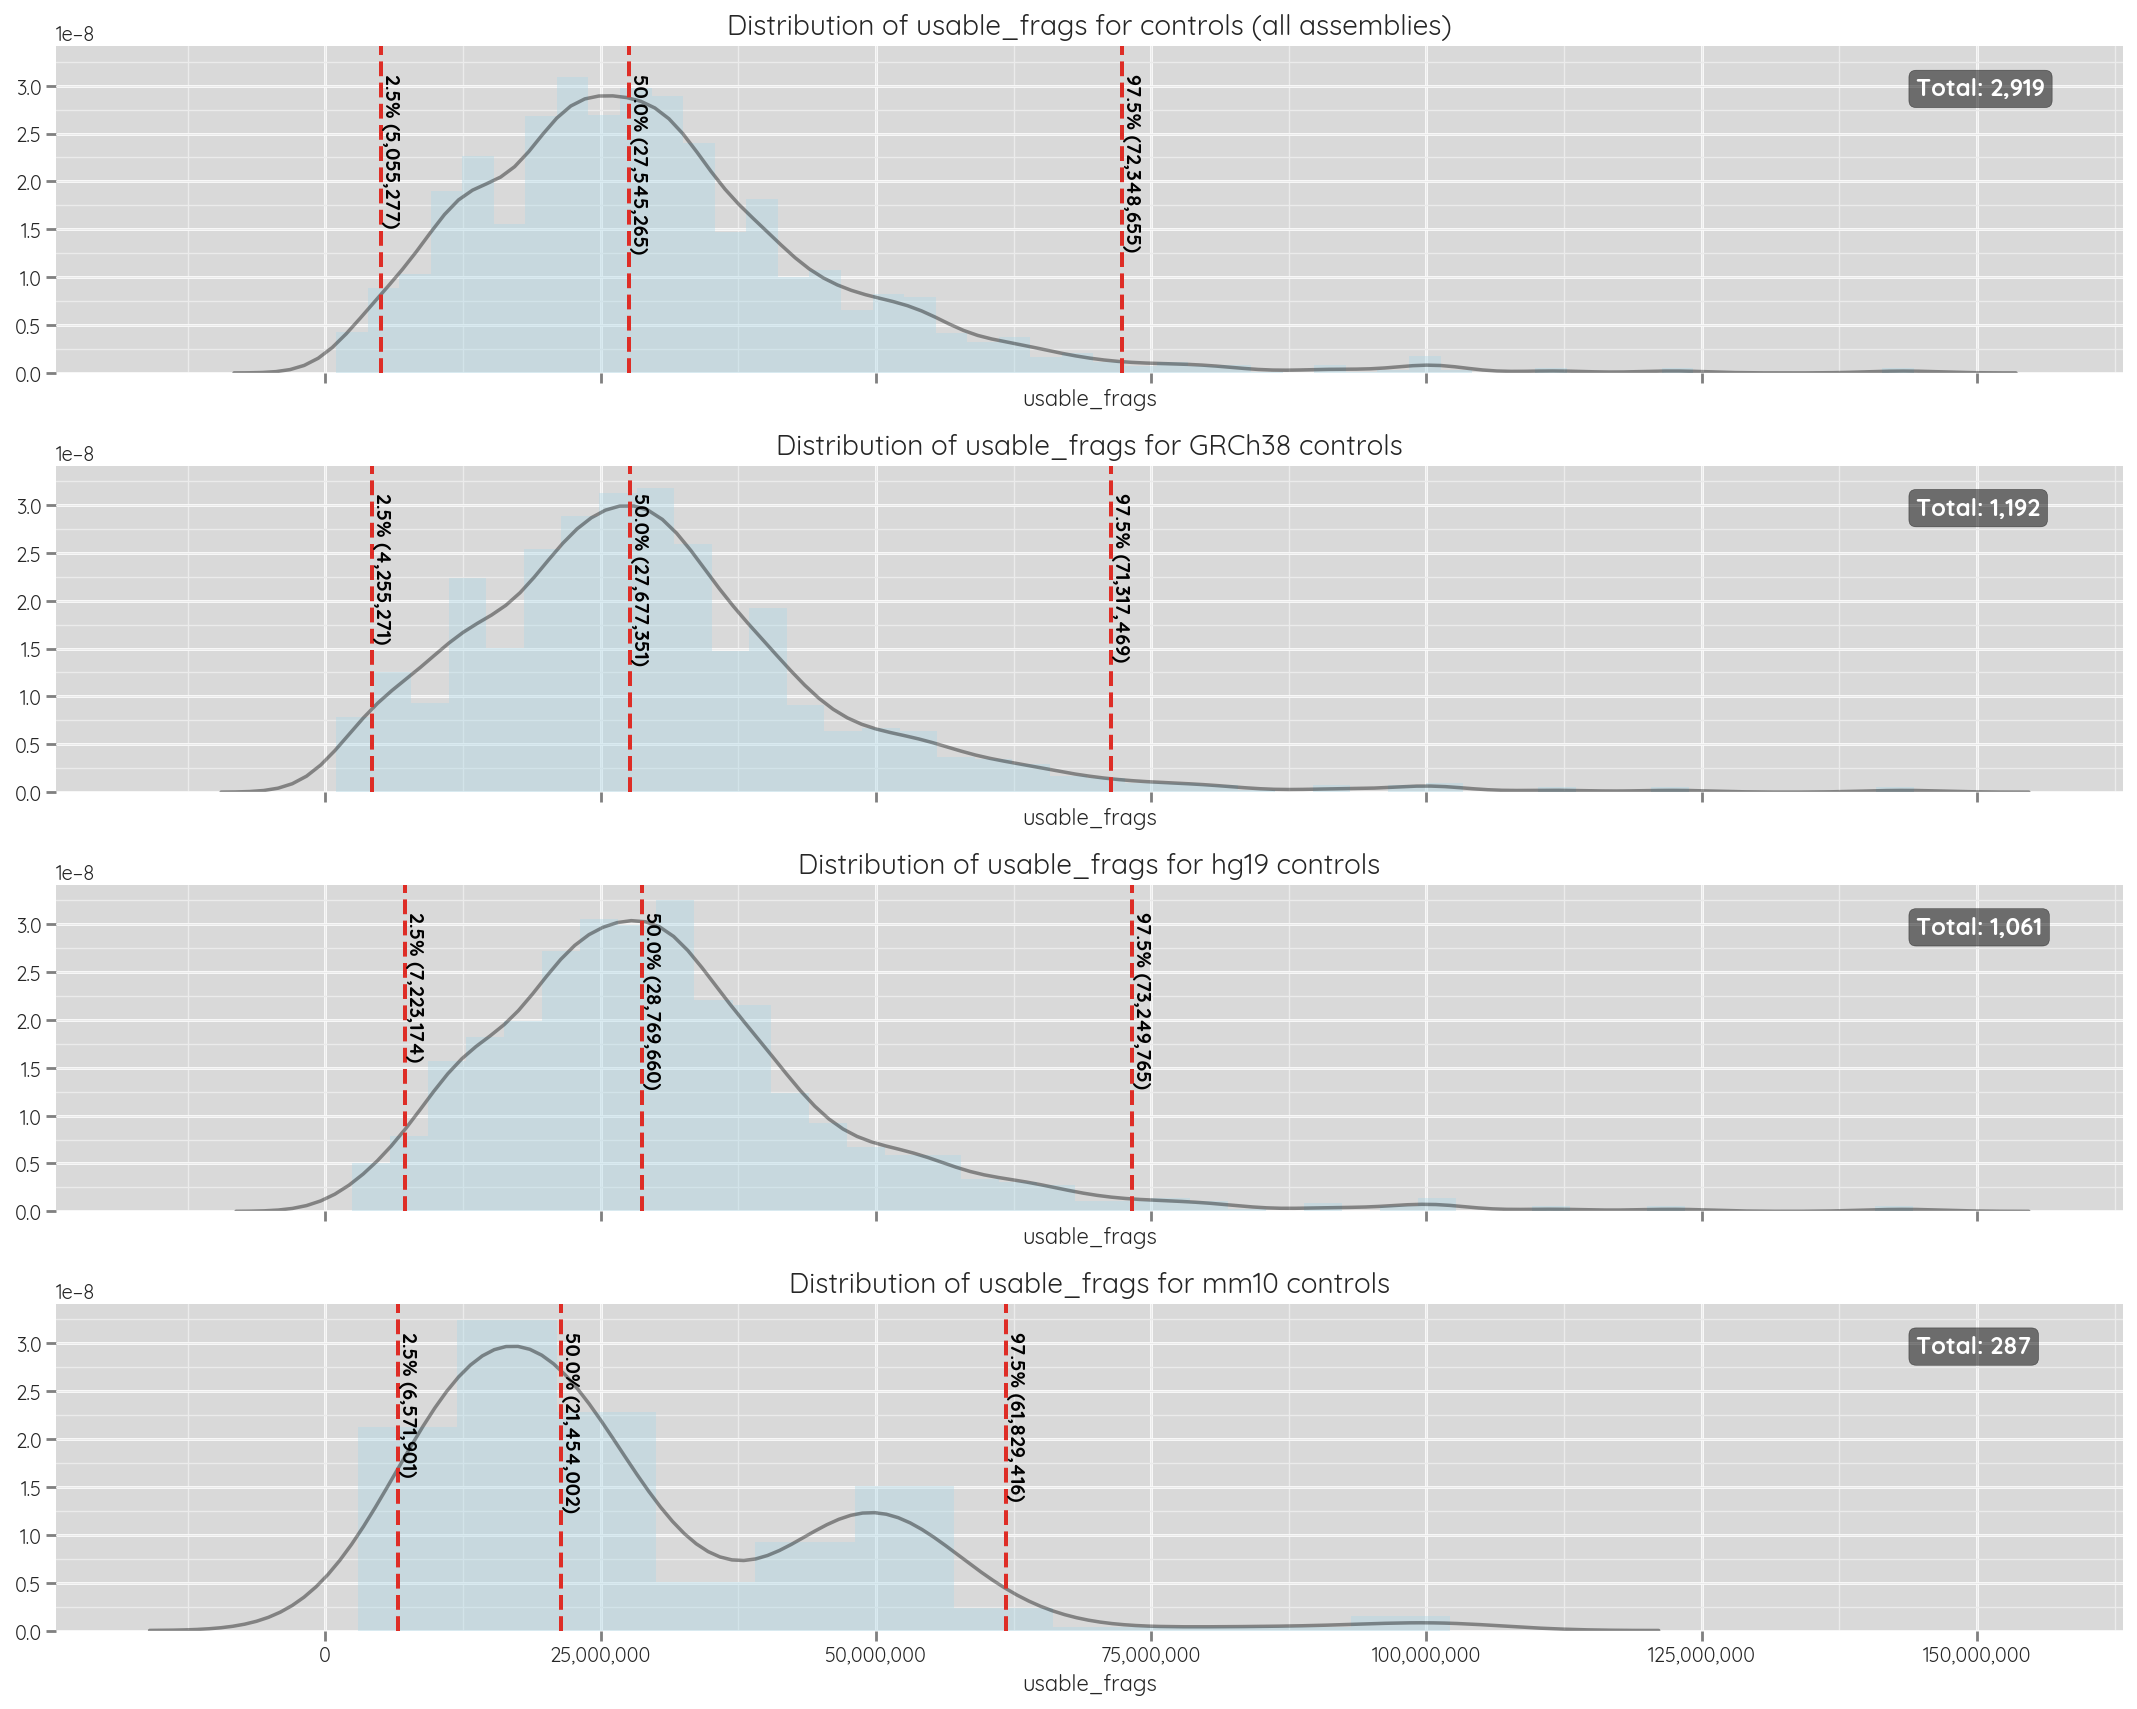

In [270]:
face = facets[:4]
fig, axes = plt.subplots(len(face), 1, figsize=[15, 12], sharey=True, sharex=True)
for ax, (title, data) in zip(axes, face):
    make_plot(
        data,
        title,
        ax,
        'usable_frags'
    )
plt.tight_layout()

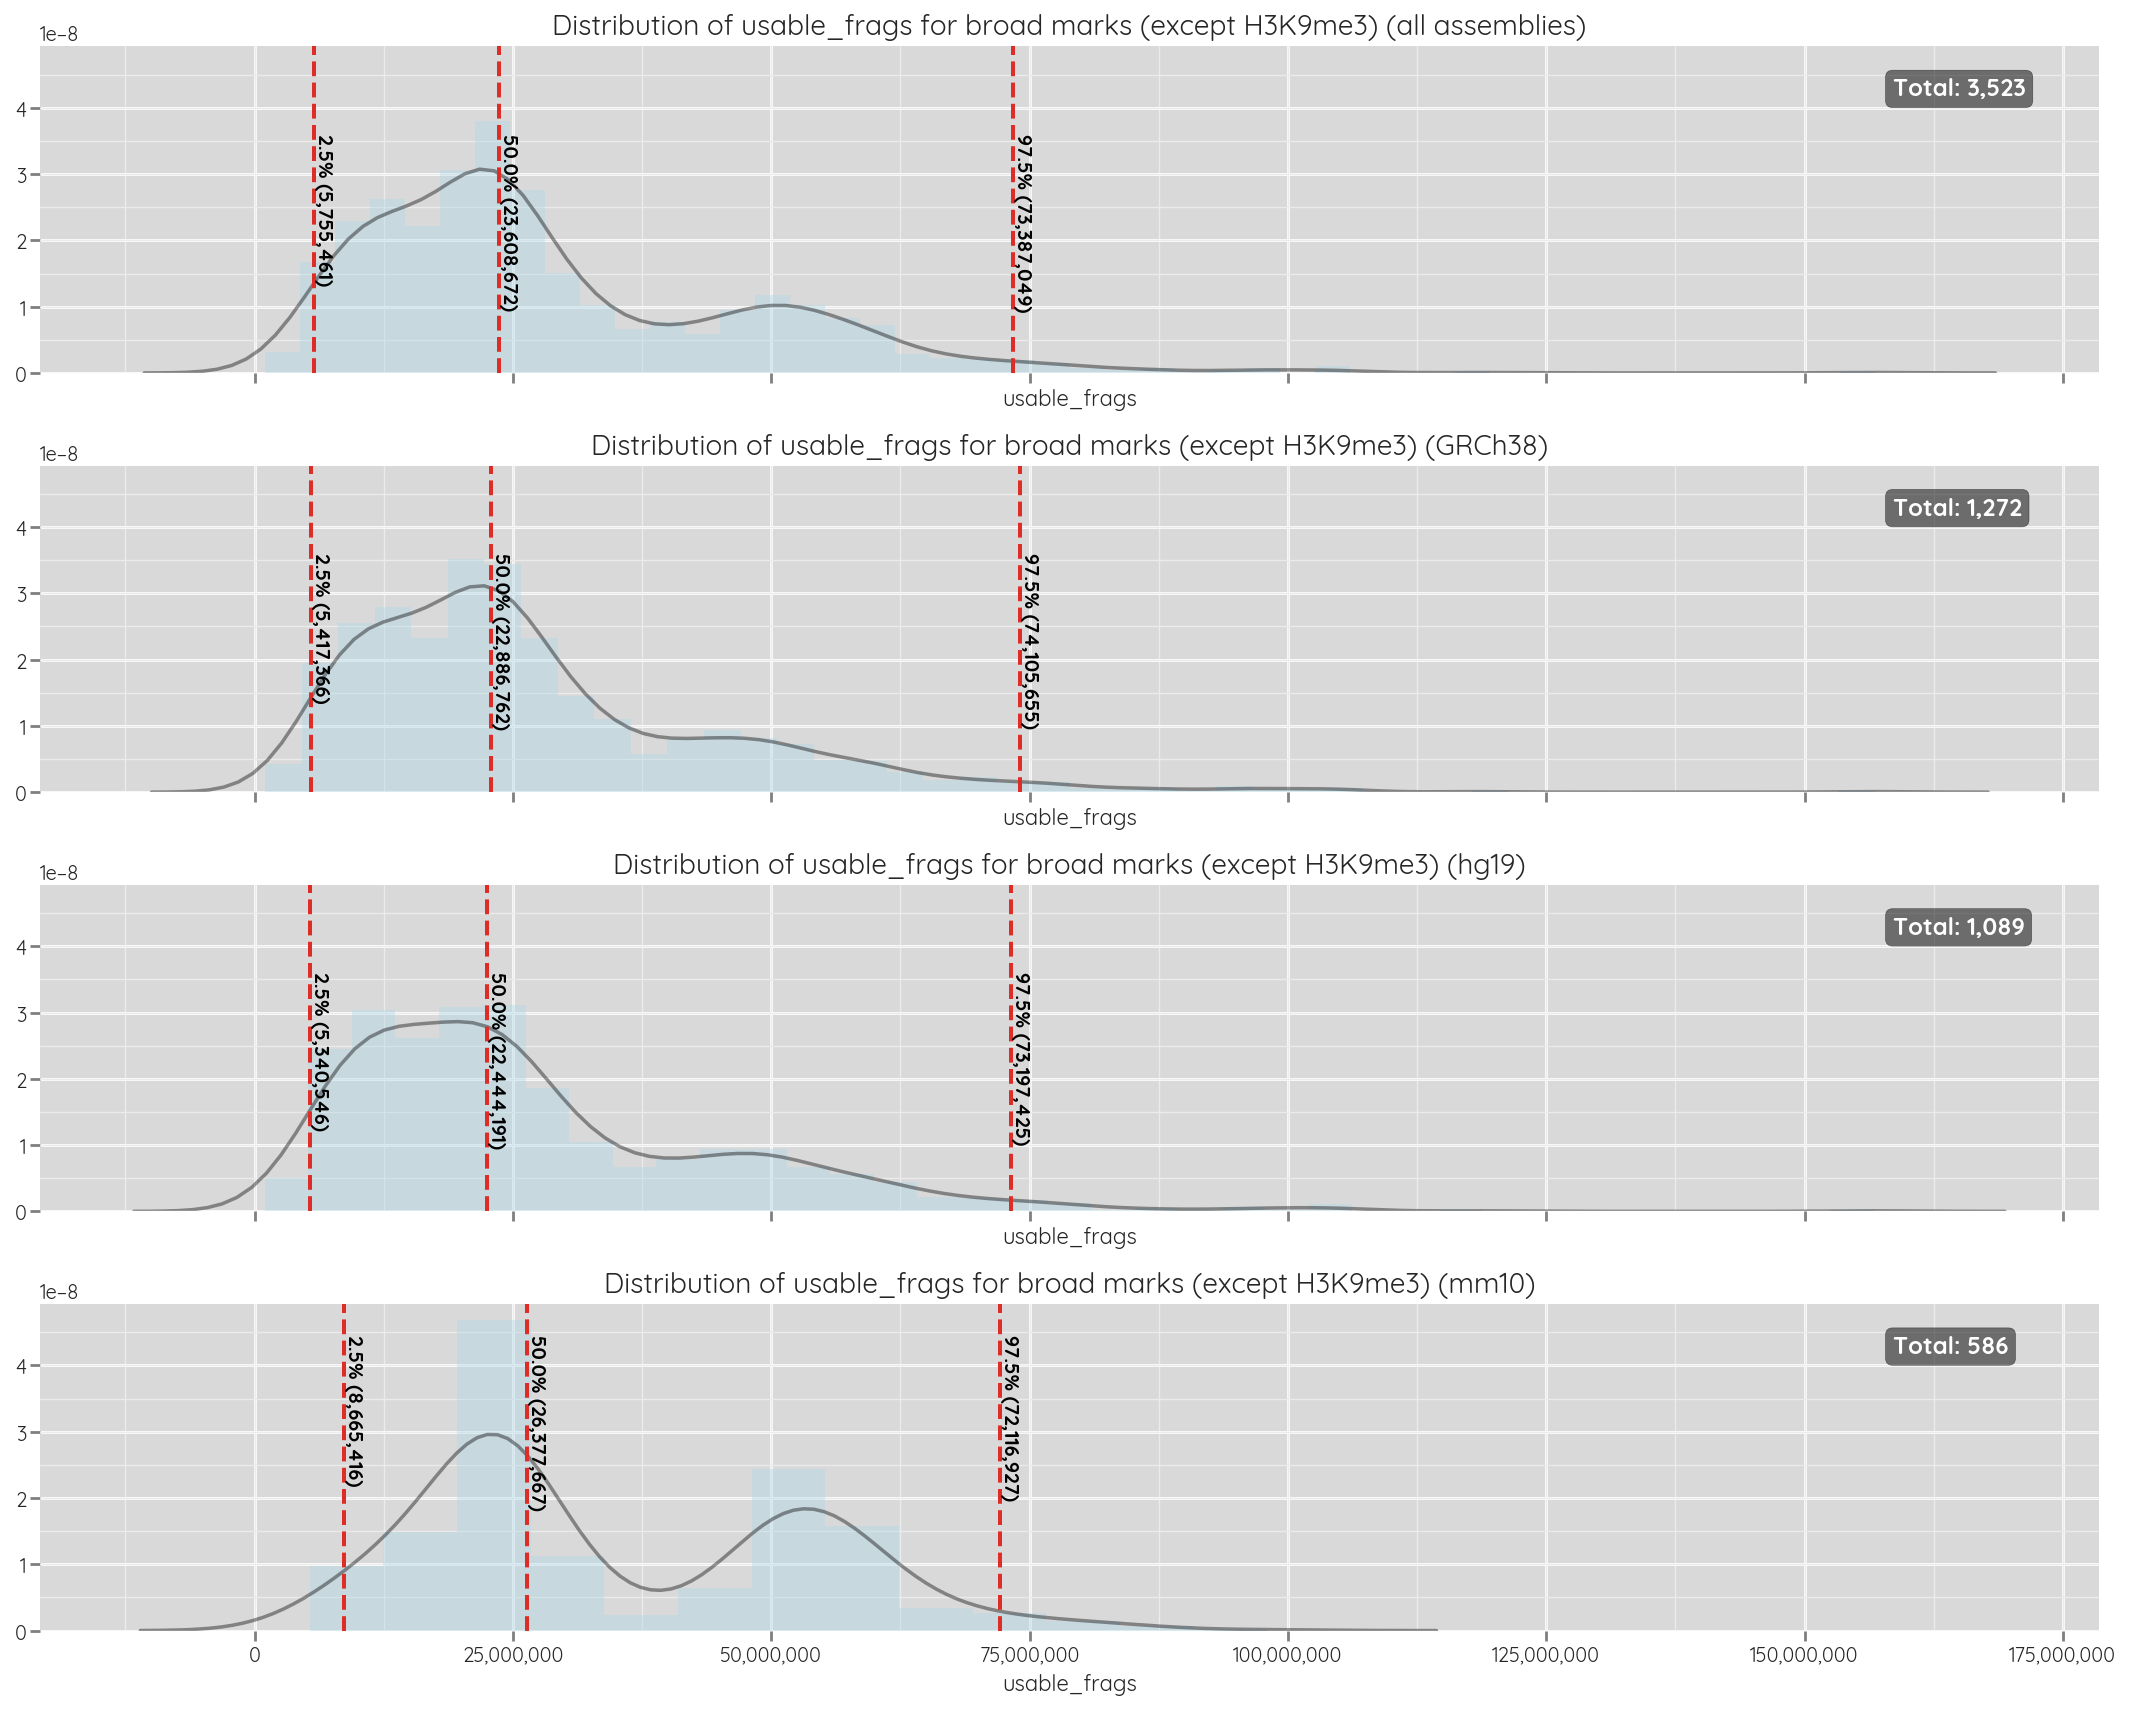

In [271]:
face = facets[4:8]
fig, axes = plt.subplots(len(face), 1, figsize=[15, 12], sharey=True, sharex=True)
for ax, (title, data) in zip(axes, face):
    make_plot(
        data,
        title,
        ax,
        'usable_frags'
    )
plt.tight_layout()

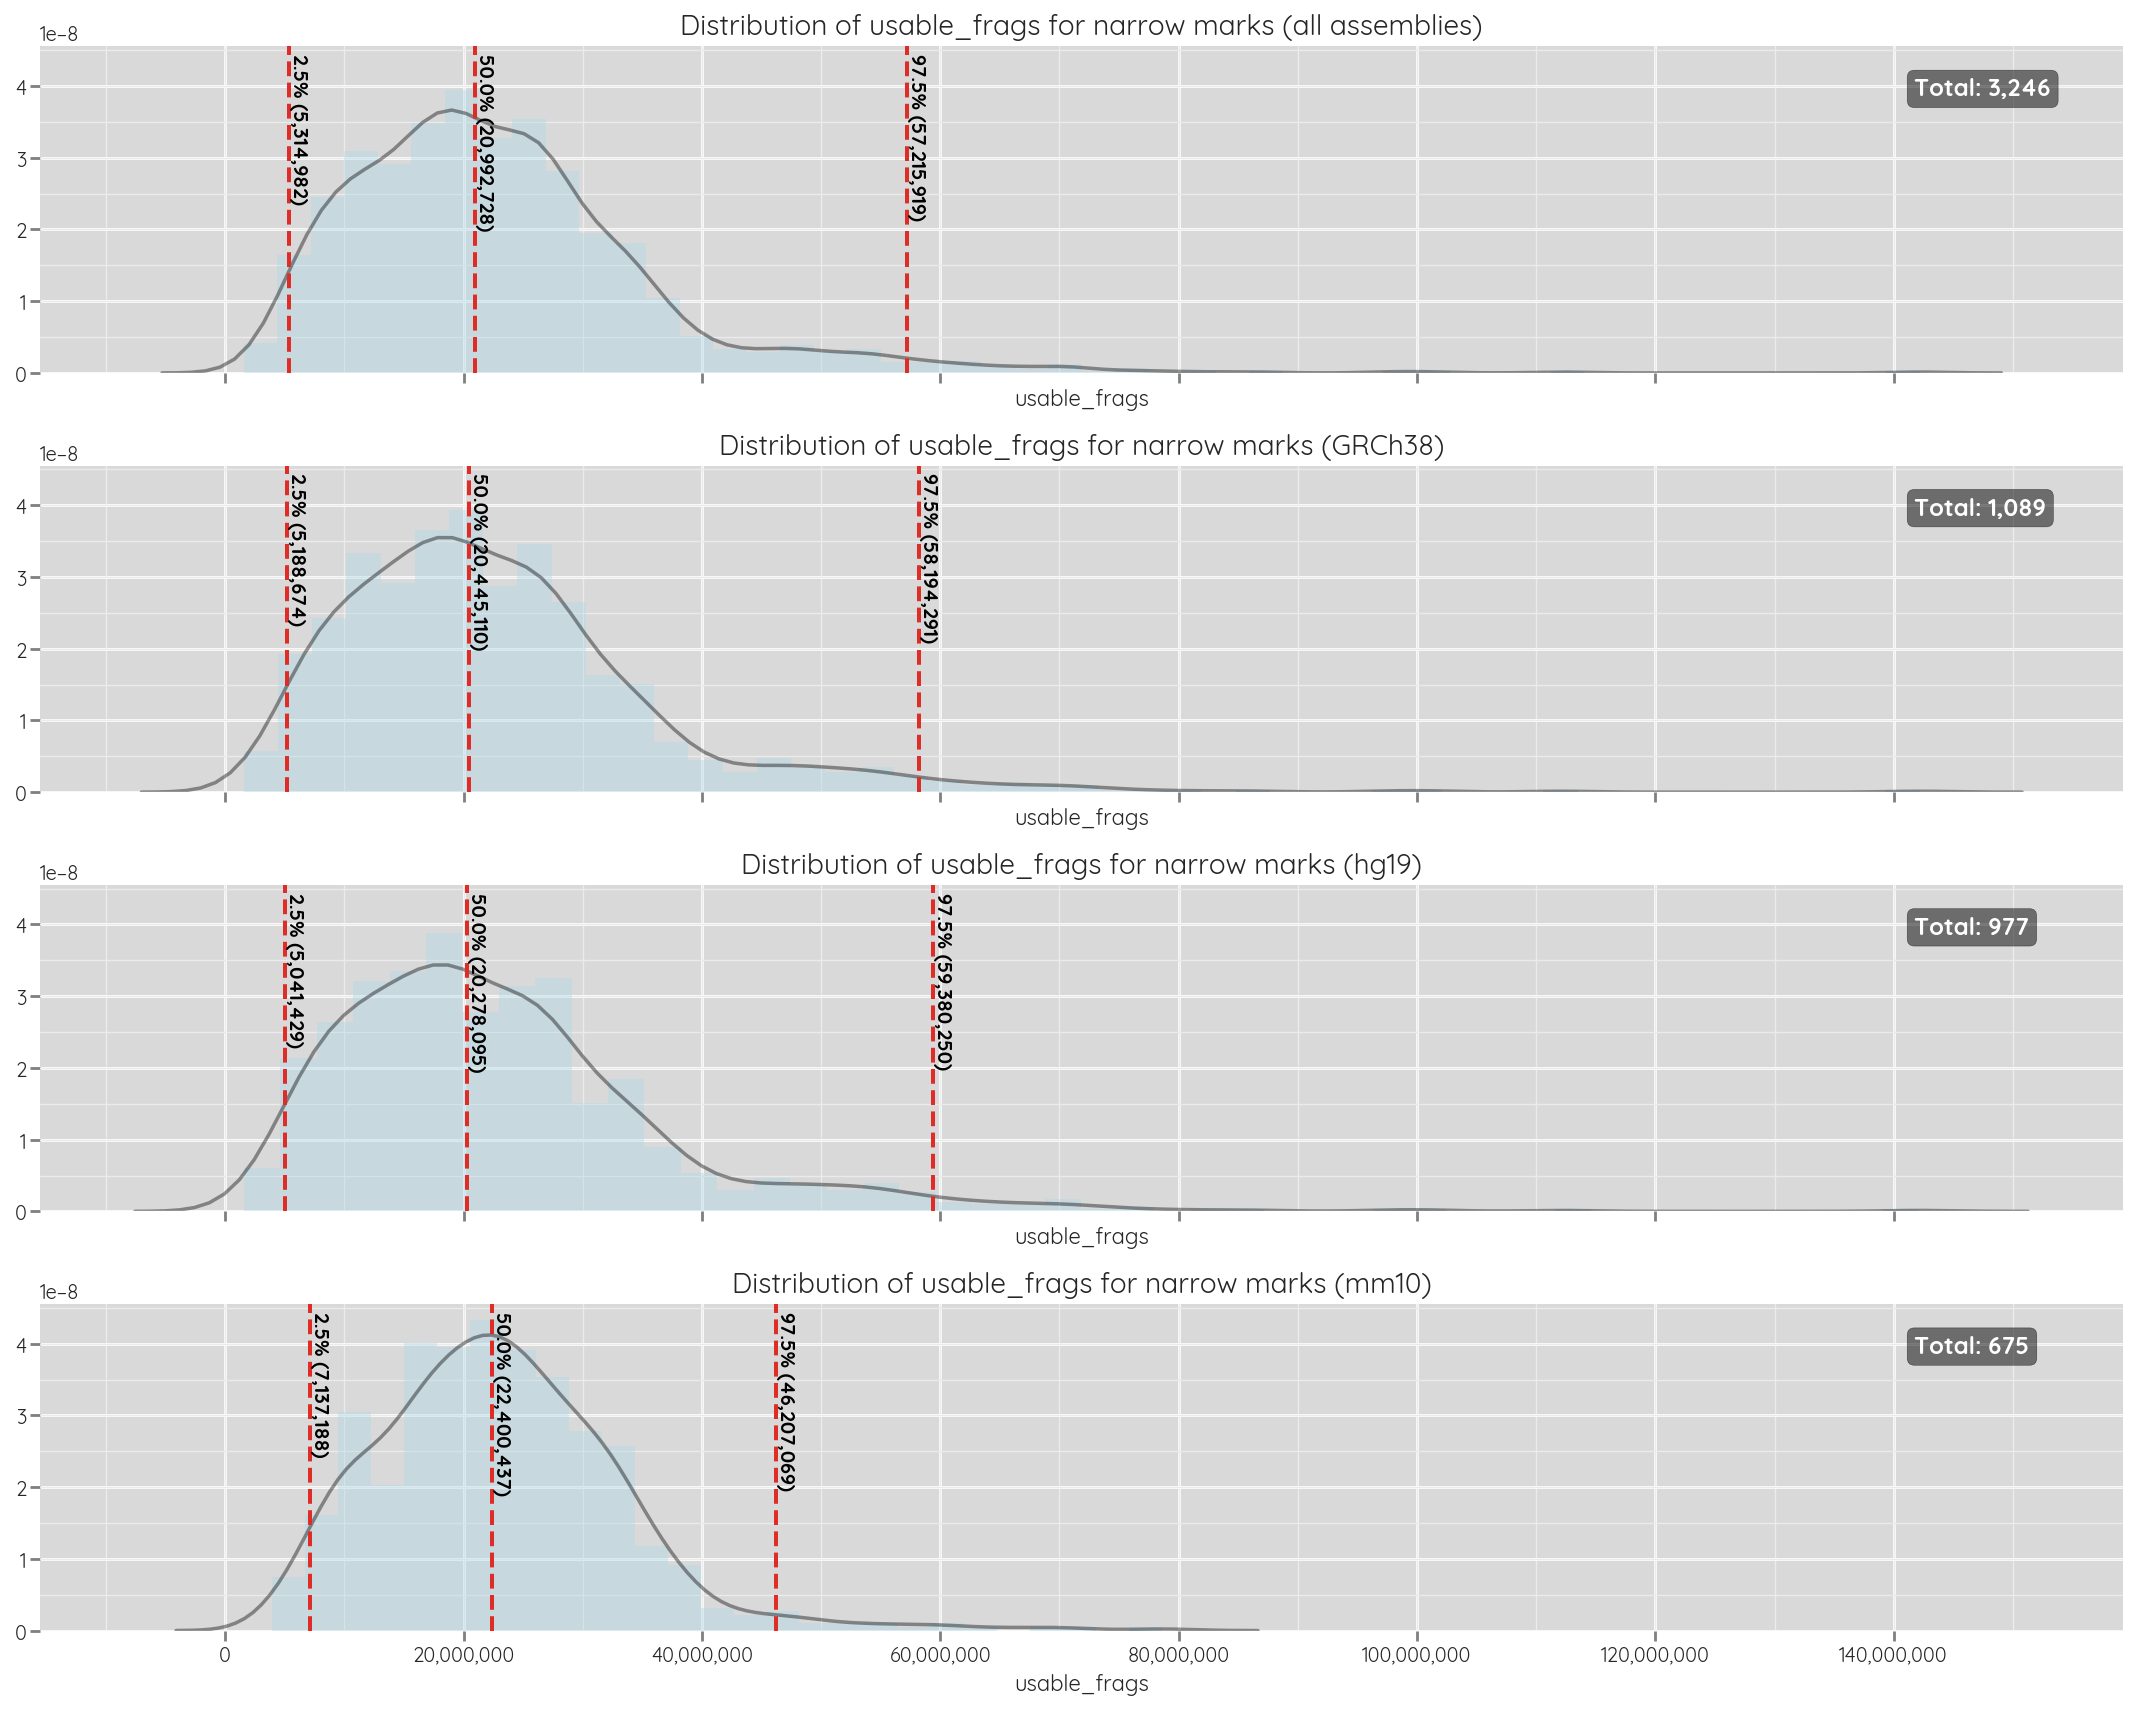

In [272]:
face = facets[8:12]
fig, axes = plt.subplots(len(face), 1, figsize=[15, 12], sharey=True, sharex=True)
for ax, (title, data) in zip(axes, face):
    make_plot(
        data,
        title,
        ax,
        'usable_frags'
    )
plt.tight_layout()

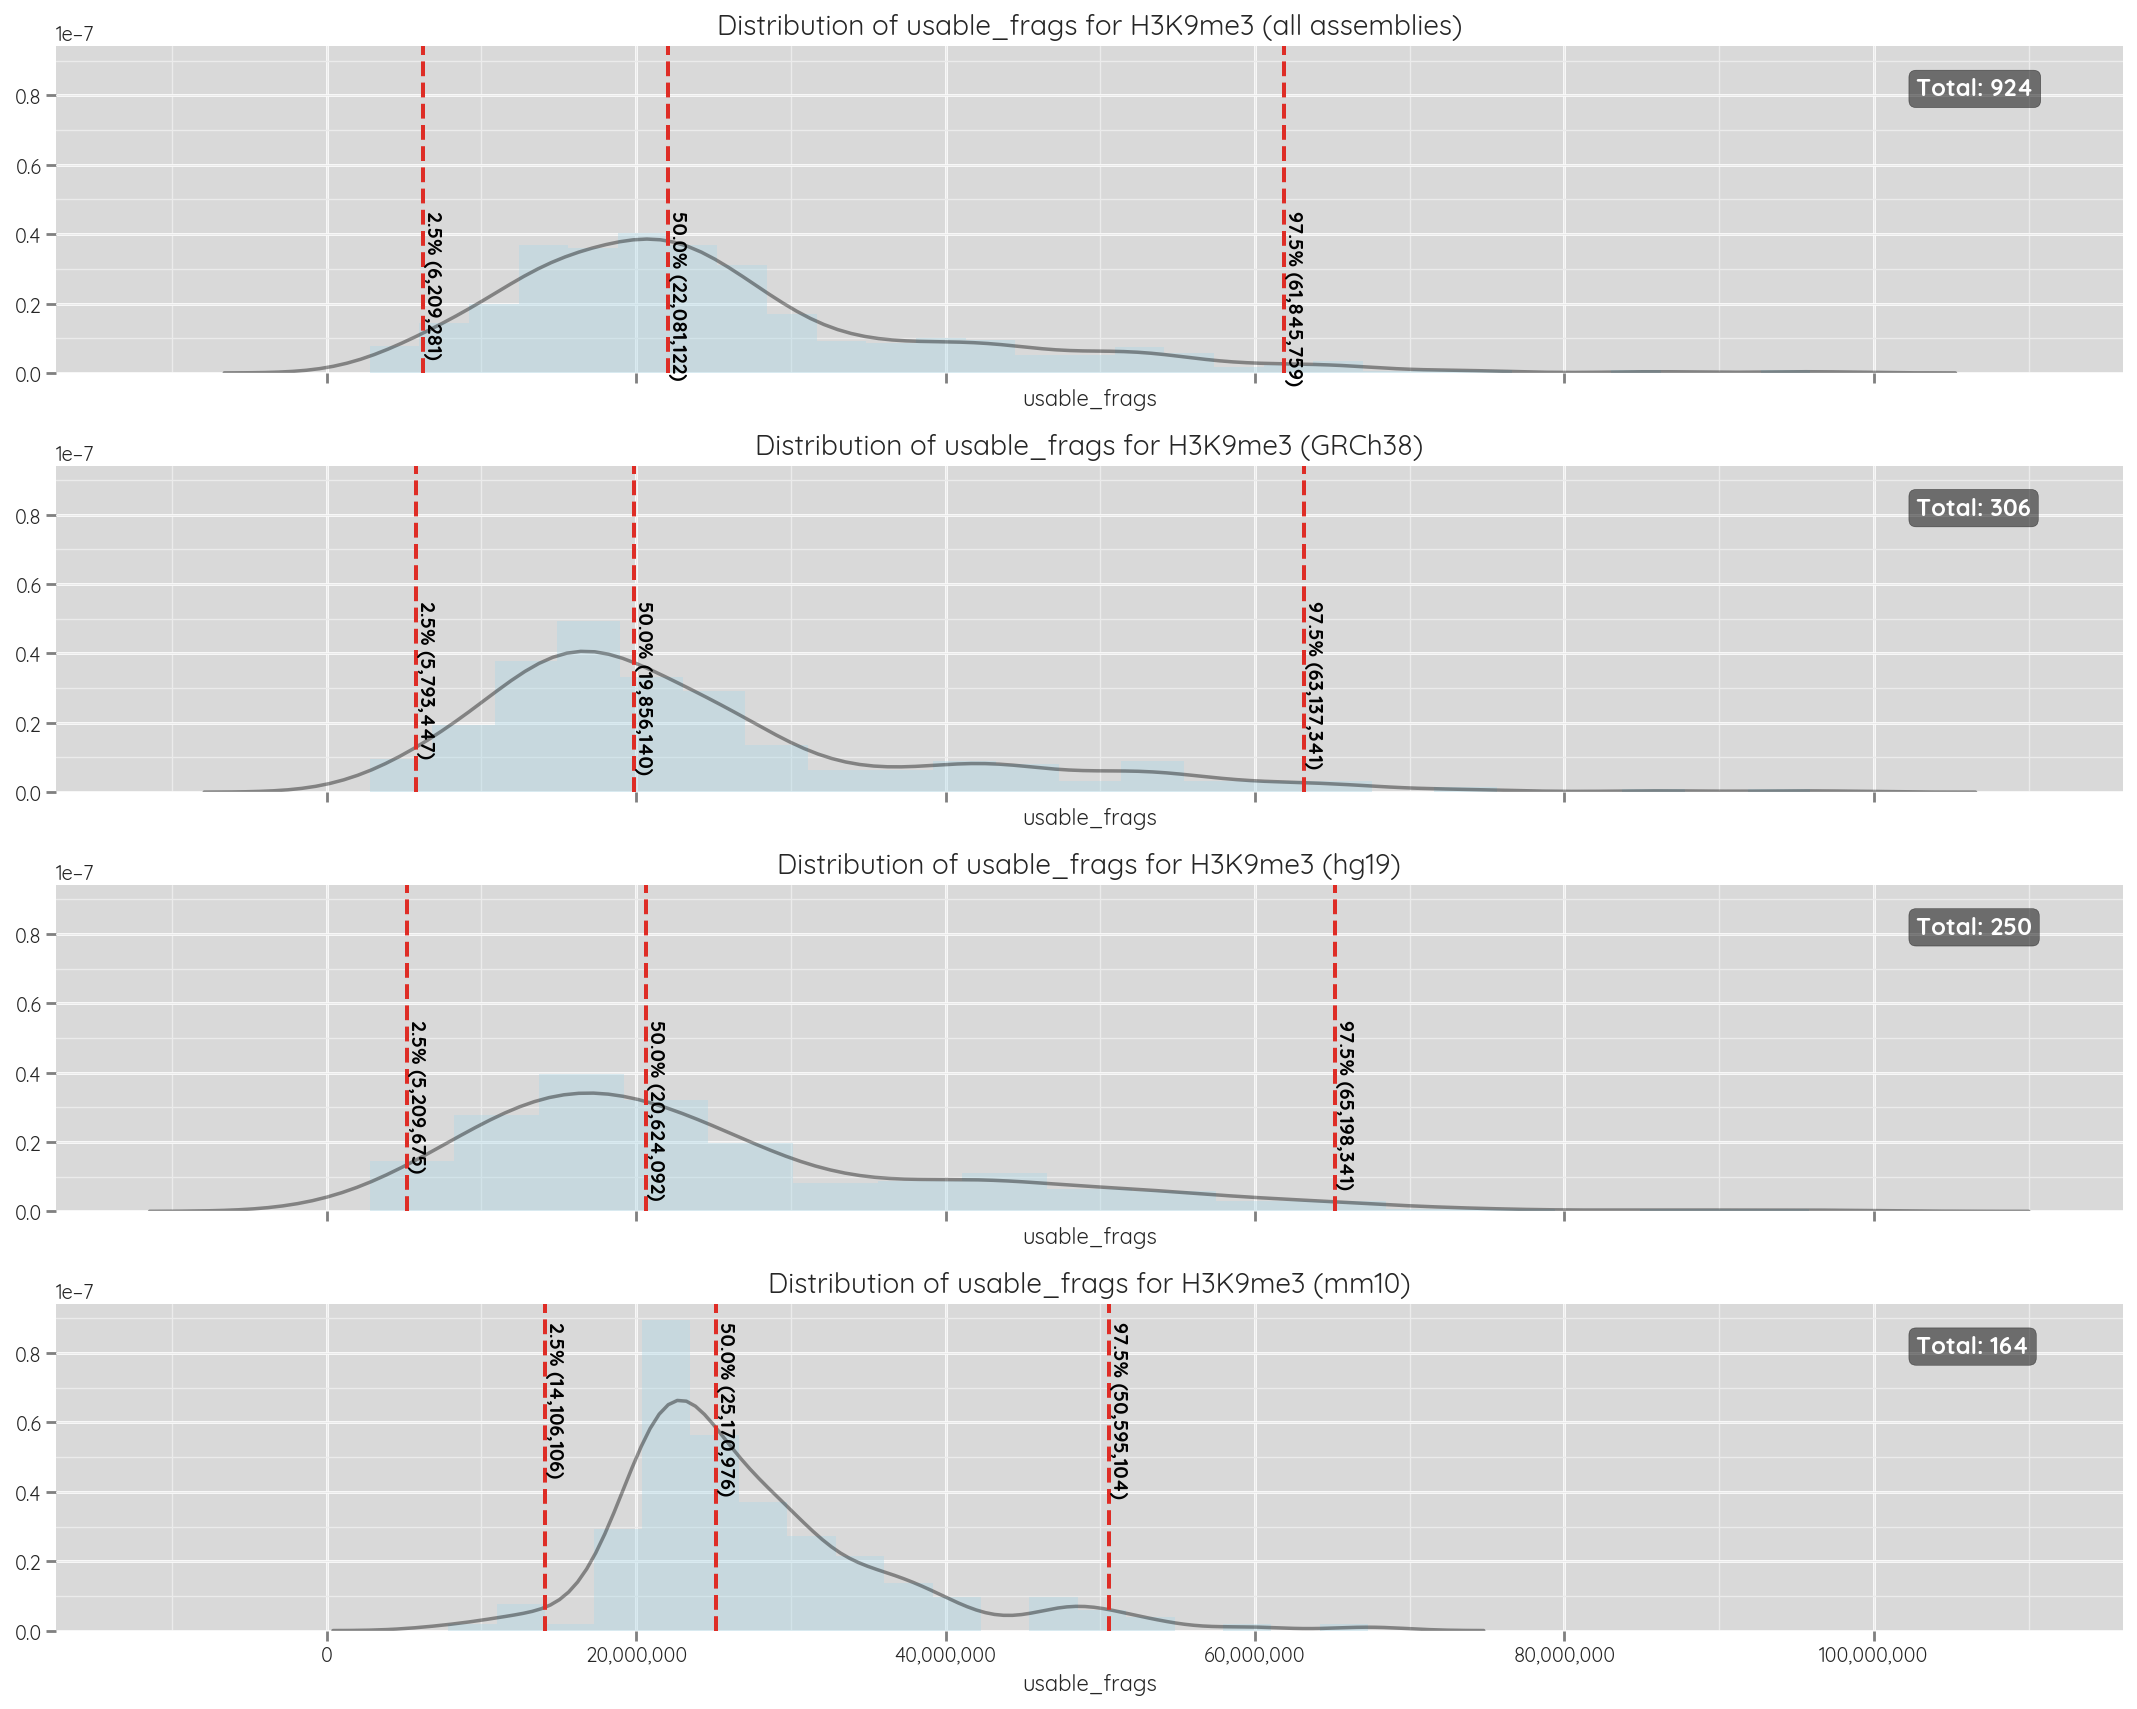

In [273]:
face = facets[12:]
fig, axes = plt.subplots(len(face), 1, figsize=[15, 12], sharey=True, sharex=True)
for ax, (title, data) in zip(axes, face):
    make_plot(
        data,
        title,
        ax,
        'usable_frags'
    )
plt.tight_layout()

In [100]:
df.target_type.value_counts()

transcription factor                                                               4781
histone,histone modification,broad histone mark                                    4447
histone,histone modification,narrow histone mark                                   3246
control                                                                            2919
transcription factor,RNA binding protein                                           1168
recombinant protein,transcription factor                                           1046
transcription factor,recombinant protein                                            574
transcription factor,chromatin remodeller                                           437
histone,histone modification                                                        375
transcription factor,chromatin remodeller,RNA binding protein                       345
RNA binding protein,transcription factor                                            300
other context,other post-transla

In [111]:
df[(df.target_type.apply(lambda x: 'broad histone' in x)) & ~(df.target.apply(lambda x: 'H3K9me3' in x))].target_type.value_counts()

histone,histone modification,broad histone mark    3523
Name: target_type, dtype: int64

In [107]:
df[df.target.apply(lambda x: 'H3K9me3' in x)].target.value_counts()

H3K9me3-human    760
H3K9me3-mouse    164
Name: target, dtype: int64

In [135]:
df.usable_frags.dropna().quantile(0.025)

5403144.0

In [121]:
df.quantile(0.025, axis=1).idxmax()

18285

In [148]:
from matplotlib.spines import Spine
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

def rstyle(ax): 
    """Styles an axes to appear like ggplot2
    Must be called after all plot and axis manipulation operations have been carried out (needs to know final tick spacing)
    """
    #set the style of the major and minor grid lines, filled blocks
    ax.grid(True, 'major', color='w', linestyle='-', linewidth=1.4)
    ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
    ax.patch.set_facecolor('0.85')
    ax.set_axisbelow(True)
    
    #set minor tick spacing to 1/2 of the major ticks
    ax.xaxis.set_minor_locator(MultipleLocator((ax.get_xticks()[1] - ax.get_xticks()[0]) / 2.0))
    ax.yaxis.set_minor_locator(MultipleLocator((ax.get_yticks()[1] - ax.get_yticks()[0]) / 2.0))
    
    #remove axis border
    for child in ax.get_children():
        if isinstance(child, Spine):
            child.set_alpha(0)
       
    #restyle the tick lines
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_markersize(5)
        line.set_color("gray")
        line.set_markeredgewidth(1.4)
    
    #remove the minor tick lines    
    for line in ax.xaxis.get_ticklines(minor=True) + ax.yaxis.get_ticklines(minor=True):
        line.set_markersize(0)
    
    #only show bottom left ticks, pointing out of axis
    rcParams['xtick.direction'] = 'out'
    rcParams['ytick.direction'] = 'out'
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')